# TDI 12-day program, Day 5: Plotting

Below are the questions and answers from day 5 of the 12-day program. Data are from the [New York City Value of Energy Cost Savings Program](https://data.cityofnewyork.us/City-Government/Value-of-Energy-Cost-Savings-Program-Savings-for-B/bug8-9f3g) and the .csv file created on day 4.

## Python script header

Begin by importing necessary modules and the data we will be parsing.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(
    'Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv')
NTA_df = pd.read_csv('ECSP_2020_savings_jobs_by_NTA.csv')

## 1. Create a scatter plot of jobs created versus average savings. Use both a standard and a logarithmic scale for the average savings.

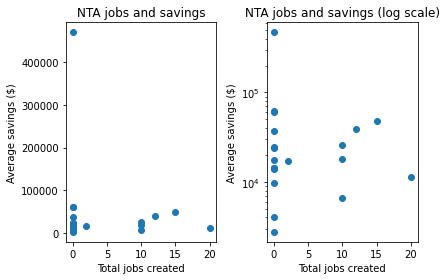

In [2]:
# We'll do this as two subplots in one figure
fig, ax = plt.subplots(1,2)

# First, the standard y-axis plot
ax[0].scatter(NTA_df['Job created'], NTA_df['Average Savings'])
ax[0].set_xlabel('Total jobs created')
ax[0].set_ylabel('Average savings ($)')
ax[0].set_title('NTA jobs and savings')

# This plot is the same, but with a log scale on the y axis
ax[1].scatter(NTA_df['Job created'], NTA_df['Average Savings'])
ax[1].set_xlabel('Total jobs created')
ax[1].set_ylabel('Average savings ($)')
ax[1].set_title('NTA jobs and savings (log scale)')
ax[1].set_yscale('log') # set log scale

# Let matplotlib adjust the layout
fig.tight_layout()
# Display the plot
plt.show()

## 2. Create a histogram of the log of the average total savings.

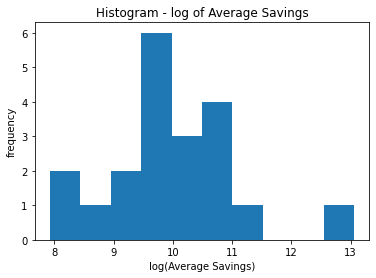

In [3]:
fig, ax = plt.subplots(1,1)
# Let matplotlib automatically generate histogram bins
ax.hist(np.log(NTA_df['Average Savings']))
ax.set_xlabel('log(Average Savings)')
ax.set_ylabel('frequency')
ax.set_title('Histogram - log of Average Savings')
plt.show()

## 3. Create a line plot of the total jobs created for each month.

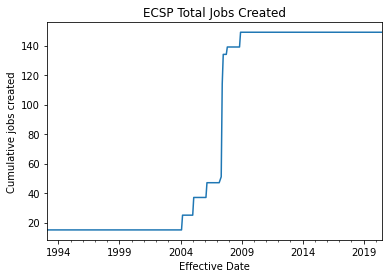

In [4]:
# Group jobs created by month
df['Effective Date'] = pd.to_datetime(df['Effective Date'])
Job_by_month = df.groupby(
                pd.Grouper(key='Effective Date', freq='M')
                )['Job created'].sum()
# Cumulatively sum jobs created
csum = (Job_by_month).cumsum()
csum.plot()
ax = plt.gca()
ax.set_ylabel('Cumulative jobs created')
ax.set_title('ECSP Total Jobs Created')
plt.show()